# Assignment 4: Edge Detection
Tổng quan: Ở bài tập này, chúng ta sẽ thực hành lập trình một số hàm để phát hiện cạnh, đường biên.

In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

## Câu 1:
Viết hàm sử dụng phương pháp gradient (bằng hàm có sẵn) và dùng toán tử  Sobel/Prewitt  để tính đạo hàm.
Sử dụng kết quả trên và Canny để phát hiện đường bao cho một ảnh bất kỳ. 
Kiểm tra sự ổn định của hai phương pháp trên toàn bô số ảnh hạt thóc trong thư mục
hiện thời. Nhận xét kết quả đạt được (tỉ lệ thành công của mỗi phương pháp).


### 1.1 Sobel Edge Detection
Thư viện OpenCV cung cấp hàm cv2.Sobel() để tính đạo hàm Sobel của ảnh. 

Xem thêm các tham số của hàm: https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d

Để các thuật toán phát hiện biên edge detection làm việc tốt, trước hết ta cần làm mịn ảnh để loại bớt nhiễu. Ta có thể dùng hàm cv2.GaussianBlur() để làm mịn ảnh.

Hàm cv2.Sobel() cho phép tính đạo hàm theo các hướng dọc và ngang của ảnh, để tổng hợp kết quả, ta lấy trung bình của đạo hàm theo hai hướng tại mỗi điểm ảnh.

Cuối cùng, Sobel sẽ làm nổi bật các đường biên, còn các nhiễu sẽ mờ hơn, vì vậy ta chọn ngưỡng để loại bỏ các điểm ảnh có độ sáng thấp này.

Yêu cầu:
- Đọc ảnh đầu vào
- Chuyển sang ảnh xám
- Làm mịn ảnh bằng bộ lọc Gauss
- Tính đạo hàm theo phương ngang
- Tổng hợp kết quả bằng trung bình của đạo hàm theo hai hướng
- Dùng ngưỡng để loại bỏ điểm có cường độ sáng thấp

In [20]:
def basic_sobel_edge_detection(image_path, blur_ksize=5, sobel_ksize=1, skipping_threshold=30):
    ### YOUR CODE HERE ###
    img = ... #Đọc ảnh đầu vào
    gray = ... #Chuyển ảnh thành ảnh đa mức xám
    img_gaussian = ... #Lọc ảnh đa mức xám bằng bộ lọc Gauss với kích thước phụ thuộc vào blur_ksize 

    #sobel
    img_sobelx = cv2.Sobel(img_gaussian,cv2.CV_8U,1,0,ksize=sobel_ksize)
    img_sobely = ... #Thực hiện Sobel theo phương y, tương tự theo phương x

    img_sobel = ... #Tổng hợp ảnh Sobel từ phương x và y
    
    #Cắt ngưỡng 
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] < skipping_threshold:
                img_sobel[i][j] = 0
            else:
                img_sobel[i][j] = ...
    return img_sobel
    ### YOUR CODE HERE ###

Ta thử chạy hàm với một ảnh trong bộ dữ liệu và xem kết quả

In [ ]:
image_path = 'images/seed.png'
gray = cv2.imread(image_path, 0)
img_sobel = basic_sobel_edge_detection(image_path, 7, 1, 30)

plt.subplot(121),plt.imshow(gray, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_sobel,cmap = 'gray')
plt.title('Sobel Image'), plt.xticks([]), plt.yticks([])
plt.show()

: 

Yêu cầu:
- Tương tự như hàm basic_sobel_edge_detection
- Sử dụng CV_64F thay cho CV_8U để cải thiện chất lượng
- Sau đó dùng hai hàm np.absolute() và np.uint8() để đưa về kiểu dữ liệu ban đầu

In [22]:
def sobel_edge_detection(image_path, blur_ksize=7, sobel_ksize=1, skipping_threshold=30):
    ### YOUR CODE HERE ###
    
    pass
    
    ### YOUR CODE HERE ###
    return img_sobel

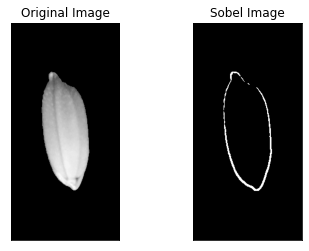

In [23]:
### YOUR CODE HERE ###

### 1.2. Prewitt Edge Detection
Để tính đạo hàm theo toán tử Prewitt, ta có thể dùng hàm cv2.filter2D() và truyền tham số kernel theo Prewitt. 

Ta sẽ tính 2 trường hợp cạnh black-to-white và white-to-black rồi tính trung bình cộng 2 kết quả. 

Cuối cùng đặt ngưỡng loại bỏ nhiễu.

In [24]:
def prewitt_edge_detection(image_path, blur_ksize = 5, skipping_threshold=30):
    ### YOUR CODE HERE ###
    img = ...
    gray = ...
    img_gaussian = ...

    #prewitt
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    img_prewittx = cv2.filter2D(img_gaussian, -1, kernelx)
    img_prewitty = cv2.filter2D(img_gaussian, -1, kernely)
    img_prewitt1 = (img_prewittx + img_prewitty)/2
    
    kernelx2 = ...
    kernely2 = ...
    img_prewittx2 = ...
    img_prewitty2 = ...
    img_prewitt2 = ...
    
    img_prewitt = (img_prewitt1 + img_prewitt2)/2
    for i in range(img_prewitt.shape[0]):
        for j in range(img_prewitt.shape[1]):
            if img_prewitt[i][j] < skipping_threshold:
                img_prewitt[i][j] = 0
            else:
                img_prewitt[i][j] = ...
    return img_prewitt
    ### YOUR CODE HERE ###

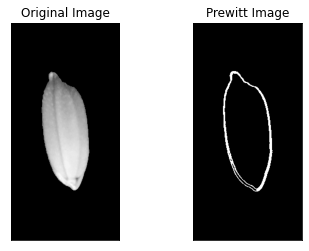

In [25]:
### YOUR CODE HERE ###

### 1.3. Canny Edge Detection
Thư viện OpenCV cung cấp hàm cv2.Canny() để phát hiện biên bằng thuật toán Canny.

https://docs.opencv.org/4.5.2/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de

Tương tự như các phương pháp phát hiện biên ở trên, trước hết ta cũng dùng cv2.GaussianBlur() để làm mịn ảnh rồi chọn ngưỡng để loại bỏ nhiễu.

In [2]:
def canny_edge_detection(image_path, blur_ksize=5, threshold1=100, threshold2=200, skipping_threshold=30):
    ### YOUR CODE HERE ###
    img = ...
    gray = ...
    img_gaussian = ...

    img_canny = ... #Lọc Canny theo 2 ngưỡng threshold1 và threshold2
    for i in range(img_canny.shape[0]):
        for j in range(img_canny.shape[1]):
            if img_canny[i][j] < skipping_threshold:
                img_canny[i][j] = ...
    return img_canny
    ### YOUR CODE HERE ###

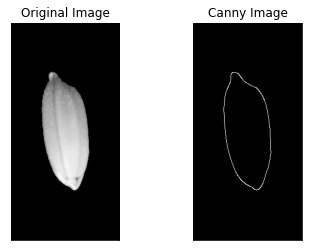

In [3]:
### YOUR CODE HERE ###

## Câu 3:
Đếm số pixel trên mỗi đường bao (chu vi) từ kết quả câu 2. Vẽ phân bố vể chu vi của mỗi
giống thóc (sử dụng dữ liệu của 30 ảnh). Nhận xét sự khác biệt giữa hai phân bố khi dùng kết
quả của hai phương pháp phát hiện biên tương ứng.

### Phân bố của Sobel edge detection

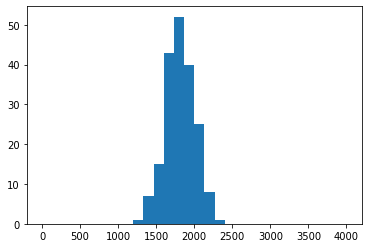

In [29]:
image_dir = 'data/'
list_c = []
for file in os.listdir(image_dir):
    image_path = os.path.join(image_dir, file)
    skipping_threshold = 30
    img_sobel = sobel_edge_detection(image_path, skipping_threshold=skipping_threshold)
    chuvi = 0
    for i in range(img_sobel.shape[0]):
        for j in range(img_sobel.shape[1]):
            if img_sobel[i][j] >= skipping_threshold:
                chuvi += 1
    list_c.append(chuvi)
plt.hist(list_c, 30, [0, 4000]); plt.show()

### Phân bố của Prewitt edge detection
Thực hiện tương tự phân bố của Sobel

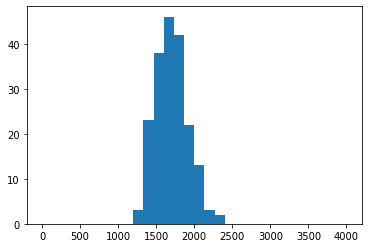

In [30]:
### YOUR CODE HERE ###

### Phân bố của Canny edge detection
Thực hiện tương tự phân bố của Sobel

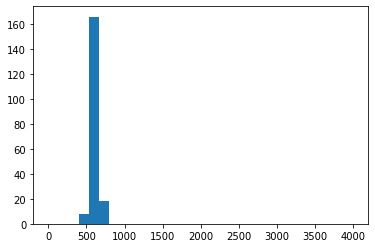

In [31]:
### YOUR CODE HERE ###


## Câu 4:
Phát hiện làn đường: Dùng các phương pháp phát hiện biên ở trên để phát hiện làn đường trong các trường hợp sau

### 4.1: Làn đường thẳng

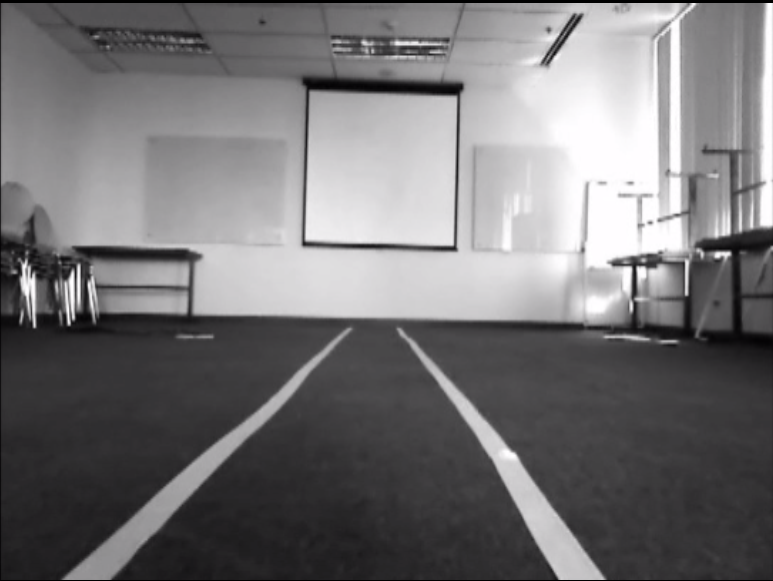

In [16]:
Image('./lane_detection/lane1.png')

Dùng hàm Sobel đã tạo

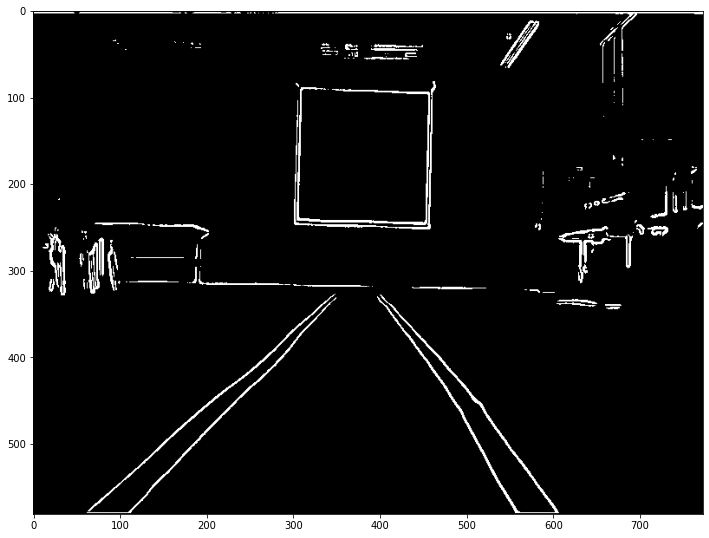

In [33]:
image_path = './lane_detection/lane1.png'

img_sobel = sobel_edge_detection(image_path, 3, 1, 30)

plt.figure(figsize=(12,12))
plt.imshow(img_sobel,cmap='gray')
plt.show()

Dùng hàm Prewitt đã tạo

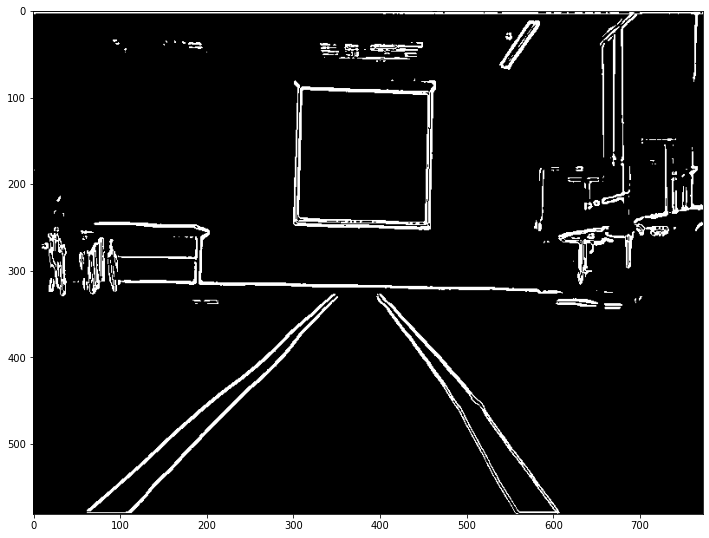

In [34]:
### YOUR CODE HERE ###

pass

### YOUR CODE HERE ###

plt.figure(figsize=(12,12))
plt.imshow(img_prewitt,cmap='gray')
plt.show()

Dùng hàm Canny đã tạo

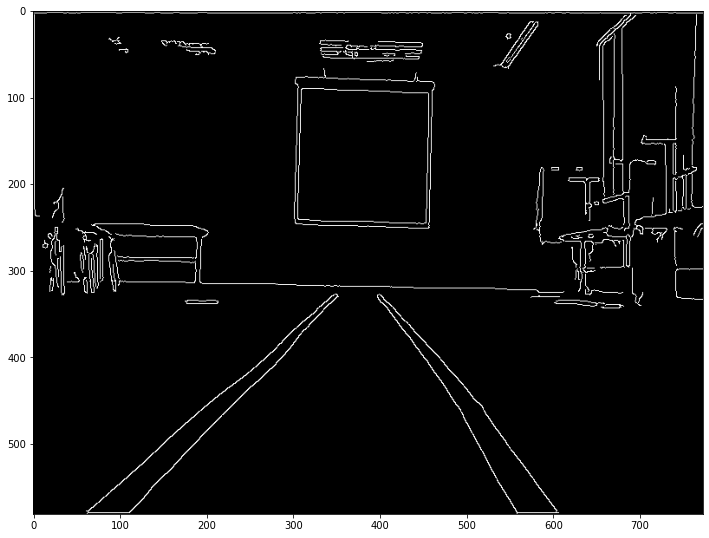

In [35]:
### YOUR CODE HERE ###

pass

### YOUR CODE HERE ###

plt.figure(figsize=(12,12))
plt.imshow(img_canny,cmap='gray')
plt.show()

### 4.2: Làn đường cong

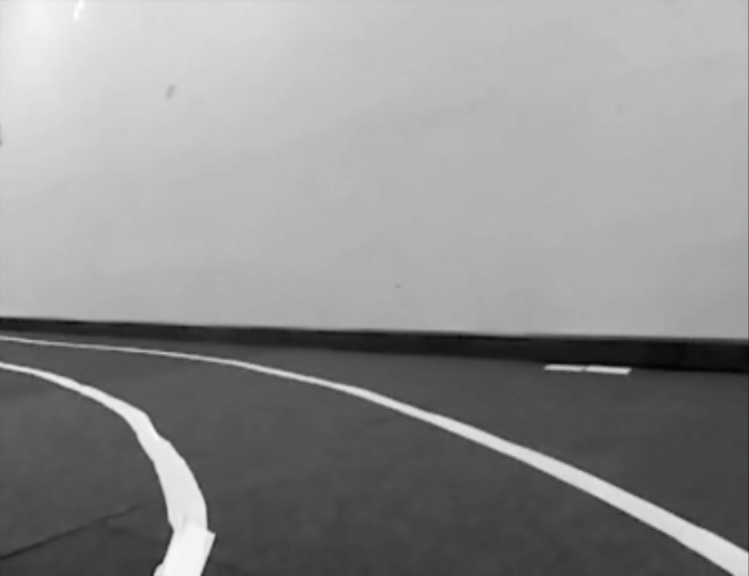

In [36]:
Image('./lane_detection/lane2.png')

Dùng Sobel đã tạo để phát hiện biên

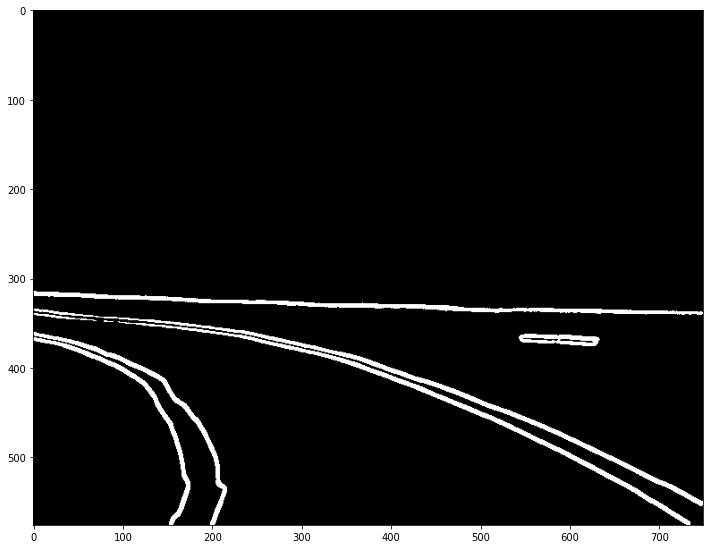

In [37]:
### YOUR CODE HERE ###

pass

### YOUR CODE HERE ###

plt.figure(figsize=(12,12))
plt.imshow(img_sobel,cmap='gray')
plt.show()

Dùng Prewitt đã tạo để phát hiện biên

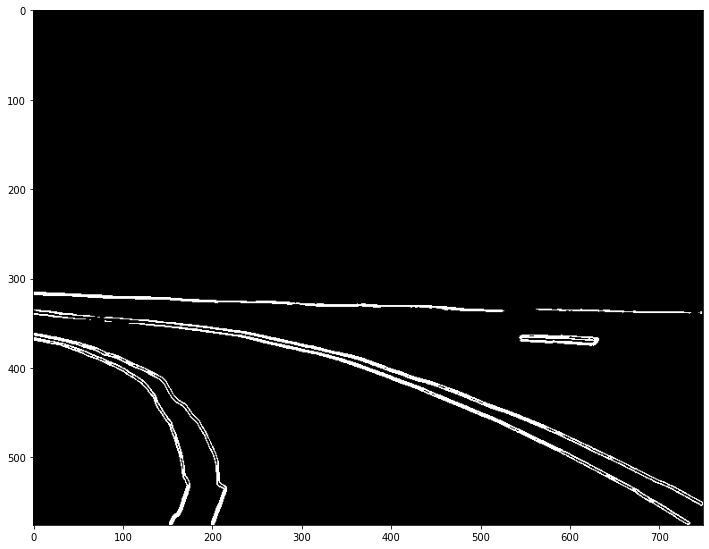

In [38]:
### YOUR CODE HERE ###

pass

### YOUR CODE HERE ###

plt.figure(figsize=(12,12))
plt.imshow(img_prewitt,cmap='gray')
plt.show()

Dùng Canny đã tạo để phát hiện biên

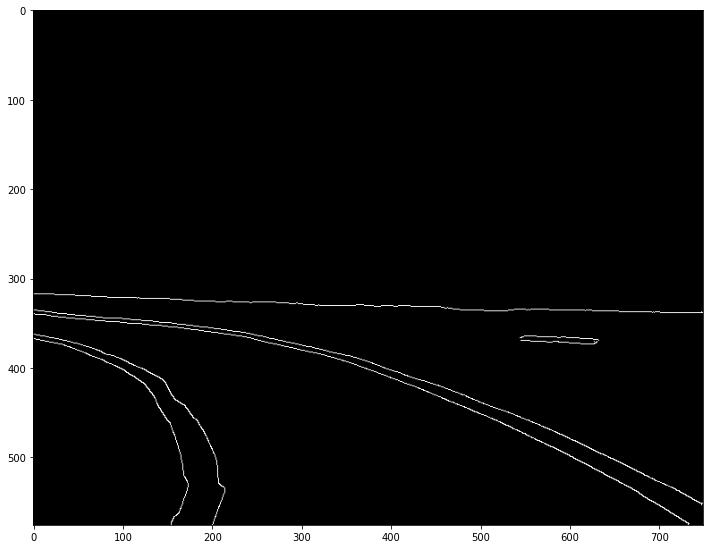

In [39]:
### YOUR CODE HERE ###

pass

### YOUR CODE HERE ###

plt.figure(figsize=(12,12))
plt.imshow(img_canny,cmap='gray')
plt.show()

### 4.3: Làn đường bóng, có nhiễu do phản chiếu
Thực hiện tương tự với 3 bộ lọc Sobel, Prewitt, và Canny đã tạo

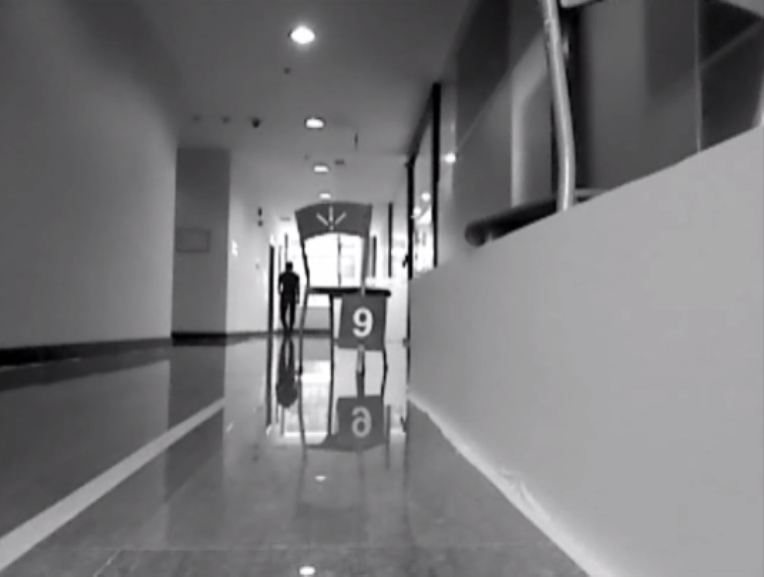

In [40]:
Image('./lane_detection/lane3.png')

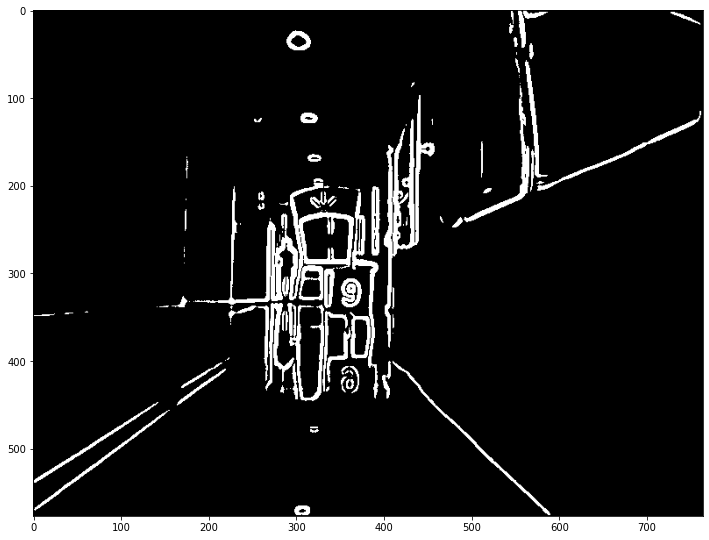

In [41]:
### YOUR CODE HERE ###

pass

### YOUR CODE HERE ###

plt.figure(figsize=(12,12))
plt.imshow(img_sobel,cmap='gray')
plt.show()

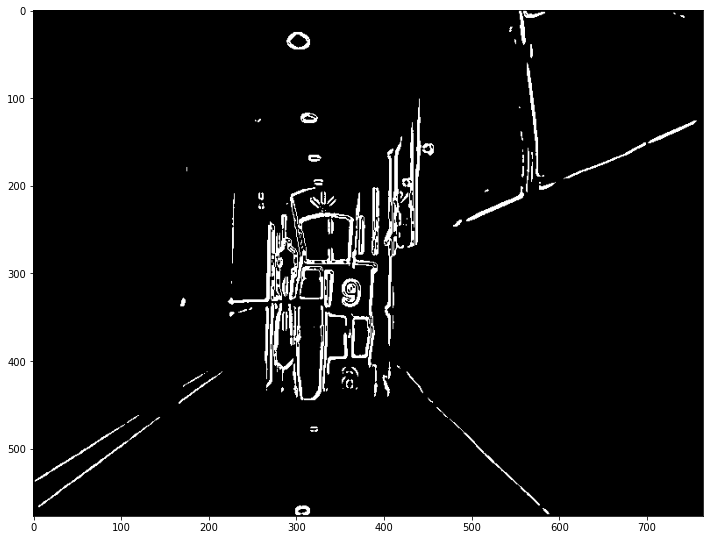

In [42]:
### YOUR CODE HERE ###

pass

### YOUR CODE HERE ###

plt.figure(figsize=(12,12))
plt.imshow(img_prewitt,cmap='gray')
plt.show()

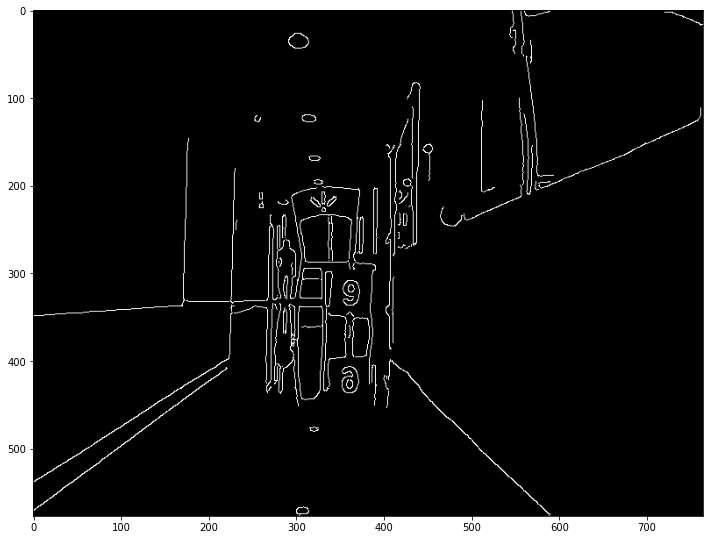

In [43]:
### YOUR CODE HERE ###

pass

### YOUR CODE HERE ###

plt.figure(figsize=(12,12))
plt.imshow(img_canny,cmap='gray')
plt.show()